<a href="https://colab.research.google.com/github/ritish1082/Study-Buddy-AI/blob/main/Study_Buddy_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Buddy AI

Craeting an AI chatbt using RAG models to take PDFs of lecture notes/slides (only text as of now) to help you study and clarify concepts by using it as a chatbot.

# 0. Dependencies

In [ ]:
! pip install langchain chromadb google-generativeai sentence-transformers pymupdf


In [2]:
! pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [3]:
from google.colab import userdata
userdata.get('LANGCHAIN_API_KEY')
userdata.get('GEMINI_API_KEY')
print("Done")

Done


In [4]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY']= userdata.get('LANGCHAIN_API_KEY')


# 1. Indexing

In [5]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text("text") + "\n"
    return text


In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

# Load the text
pdf_text = extract_text_from_pdf("/content/lecture_notes.pdf")

# Split text into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
text_chunks = text_splitter.split_text(pdf_text)

# Load embeddings model (MiniLM)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create ChromaDB and store embeddings
vector_store = Chroma.from_texts(text_chunks, embedding=embedding_model, persist_directory="./chroma_db")


<ipython-input-7-aca522bb0af8>:13: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 3})


In [11]:
# test
query = "What is the syllabus"
retrieved_docs = retriever.get_relevant_documents(query)

for i, doc in enumerate(retrieved_docs):
    print(f"🔹 Result {i+1}: {doc.page_content}\n")

🔹 Result 1: Course Evaluation
• One course project (30%)
– Working individually or in teams
– Designing and evaluating a new IR task
– Final report due April 24
• One exam in class, probably March 13
– Midterm (20%) in class 
– Focus on evaluating and thinking critically about 
retrieval models
– Some differences in questions for IS4200

🔹 Result 2: Big Issues in IR
• Evaluation
– Experimental procedures and measures for 
comparing system output with user expectations
– IR evaluation methods now used in many fields
• e.g. Speech and translation, other ML leaderboards
– Typically use test collection of documents, queries, 
and relevance judgments
• Most commonly used are TREC collections
– Recall and precision are two examples of 
effectiveness measures

🔹 Result 3: Course Evaluation
• Five assignments (10% each of course grade)
– Mostly programming and a short written report on 
your design choices and experimental results.
– Written answers and code must be your individual 
work.
– Pr

<ipython-input-11-6d45ecfbb280>:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(query)


In [12]:
! pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00


In [13]:
! pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.2 MB/s eta 0:00:00


In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import START, StateGraph
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


In [15]:
from langchain import hub


In [ ]:
# Initialize the LLM with your API key
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=userdata.get('GEMINI_API_KEY'))

In [36]:
# Define prompt for question-answering
# prompt = hub.pull("rlm/rag-prompt")

# Define the prompt template
template = """Answer the following question based on the context below.
Use your own LLM knowledge **only if the context is insufficient or vague.**
Ensure the response is inferred from the context, even if the exact phrase is not present. Dpo not give short answer elaborate them

Context: {context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)


# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(f"Document {i+1}: {doc.page_content}" for i, doc in enumerate(state["context"]))
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()




In [ ]:
response = graph.invoke({"question": "What is teh syllabus"})
print("Question:", response["question"])
print("Context:", response["context"])
print("Answer:", response["answer"])

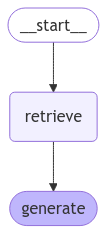

In [33]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))